In [283]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

Переменная, которую надо предсказать - ’MEDV’.

In [284]:
df = pd.read_csv(load_boston()['filename'], skiprows=1)

In [285]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [287]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

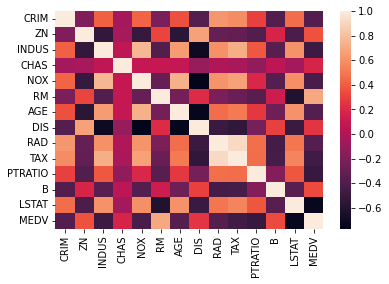

In [288]:
sns.heatmap(df.corr())

In [289]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [290]:
target = df['MEDV']
df_attributes = df.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7112260057484903

## Работа с признаками

### 1. CRIM, Per capita crime rate by town

<AxesSubplot:xlabel='CRIM'>

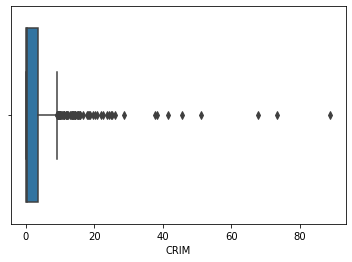

In [291]:
sns.boxplot(x=df['CRIM'])

In [292]:
df = df[df['CRIM'] < 40]

In [293]:
target = df['MEDV']
df_attributes = df.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7288309690958302

Качество модели повысилось на 0.01

### 2. ZN, Proportion of residential land zoned for lots over 25,000 sq.ft.

<AxesSubplot:xlabel='ZN'>

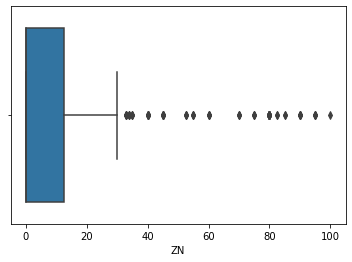

In [294]:
sns.boxplot(x=df['ZN'])

#### Уберем выбросы

In [295]:
df = df[df['ZN'] < 50]

In [296]:
target = df['MEDV']
df_attributes = df.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.752491015663788

Качество модели повысилось на 0.024

### 3. INDUS, Proportion of non-retail business acres per town

<AxesSubplot:xlabel='INDUS'>

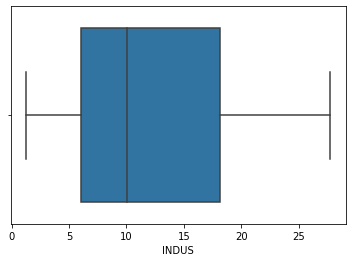

In [297]:
sns.boxplot(x=df['INDUS'])

#### Выбросы отсутствуют

### 3. NOX, nitric oxides concentration (parts per 10 million)

<AxesSubplot:xlabel='NOX'>

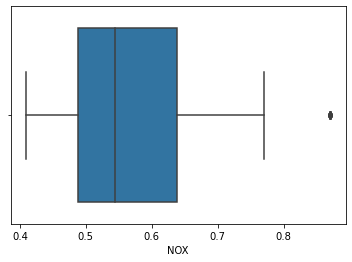

In [298]:
sns.boxplot(x=df['NOX'])

#### Уберем выбросы

In [299]:
df_test = df[df['NOX'] < 0.8]
target = df_test['MEDV']
df_attributes = df_test.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7011902033963109

Если убрать выбросы качество модели понизится

### 4. RM, average number of rooms per dwelling

<AxesSubplot:xlabel='RM'>

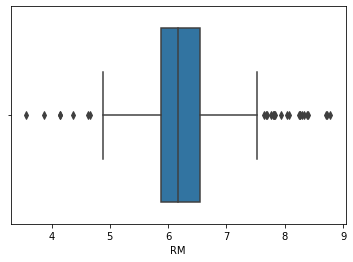

In [300]:
sns.boxplot(x=df['RM'])

In [301]:
df_test = df[(df['RM'] > 4.5) & (df['RM'] < 8.5)]
target = df_test['MEDV']
df_attributes = df_test.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7174190608193907

Если убрать выбросы качество модели понизится

### 5. AGE, proportion of owner-occupied units built prior to 1940

<AxesSubplot:xlabel='AGE'>

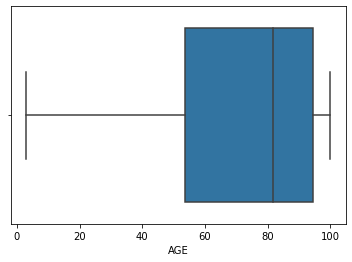

In [302]:
sns.boxplot(x=df['AGE'])

#### Выбросы отсутствуют

### 6. DIS, weighted distances to five Boston employment centres

<AxesSubplot:xlabel='DIS'>

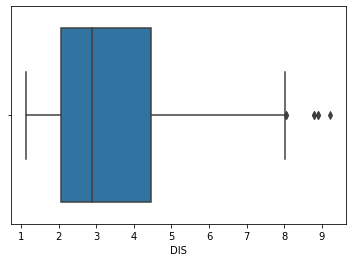

In [303]:
sns.boxplot(x=df['DIS'])

#### Уберем выбросы

In [305]:
df = df[df['DIS'] < 9]

In [306]:
target = df['MEDV']
df_attributes = df.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7693750414263609

Качество модели повысилось на 0.017

### 7. RAD, index of accessibility to radial highways

<AxesSubplot:xlabel='RAD'>

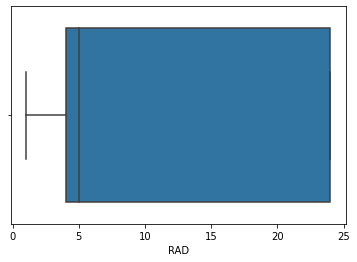

In [307]:
sns.boxplot(x=df['RAD'])

#### Выбросы отсутствуют

### 8. TAX, full-value property-tax rate per $10,000

<AxesSubplot:xlabel='TAX'>

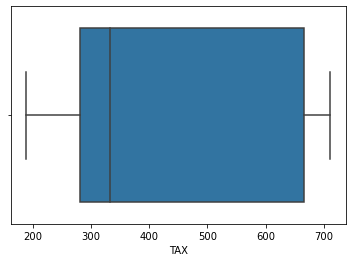

In [308]:
sns.boxplot(x=df['TAX'])

#### Выбросы отсутствуют

###9. PTRATIO, pupil-teacher ratio by town

<AxesSubplot:xlabel='PTRATIO'>

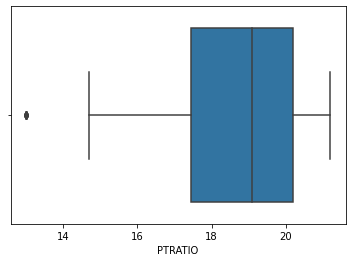

In [309]:
sns.boxplot(x=df['PTRATIO'])

In [316]:
df_test = df[df['PTRATIO'] > 14]
target = df_test['MEDV']
df_attributes = df_test.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7469075845073903

Если убрать выбросы качество модели понизится

### 10. B, 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

<AxesSubplot:xlabel='B'>

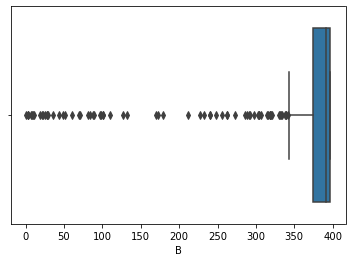

In [318]:
sns.boxplot(x=df['B'])

In [327]:
df_test = df[df['B'] > 150]
target = df_test['MEDV']
df_attributes = df_test.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7110666655511069

Если убрать выбросы качество модели понизится

### 11. LSTAT, % lower status of the population

<AxesSubplot:xlabel='LSTAT'>

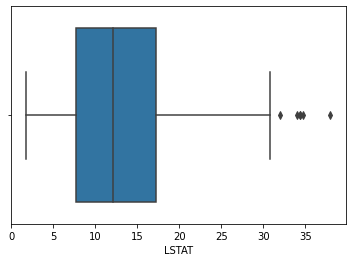

In [328]:
sns.boxplot(x=df['LSTAT'])

In [336]:
df_test = df[df['LSTAT'] < 30]
target = df_test['MEDV']
df_attributes = df_test.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

0.7245543728440232

Если убрать выбросы качество модели понизится